## PCA Implementation

In [1]:
#Predict the class of the glass based on certain elements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# we are using the free glass datset.
# The objective is to tell the type of glass based on amount of other elements present.
data = pd.read_csv('glass.data')
data

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data.head()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.shape

(214, 11)

In [6]:
data.Class.unique() # 6 class classification

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [7]:
data.Class.value_counts()

Class
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [8]:
## Basic checks
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Class   214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [9]:
data.describe()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
## Exploratory Data Analysis
# Univariate Analysis
# Bivariate Analysis

## Data Preprocessing

In [11]:
## Checking missing values
data.isnull().sum()

index    0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

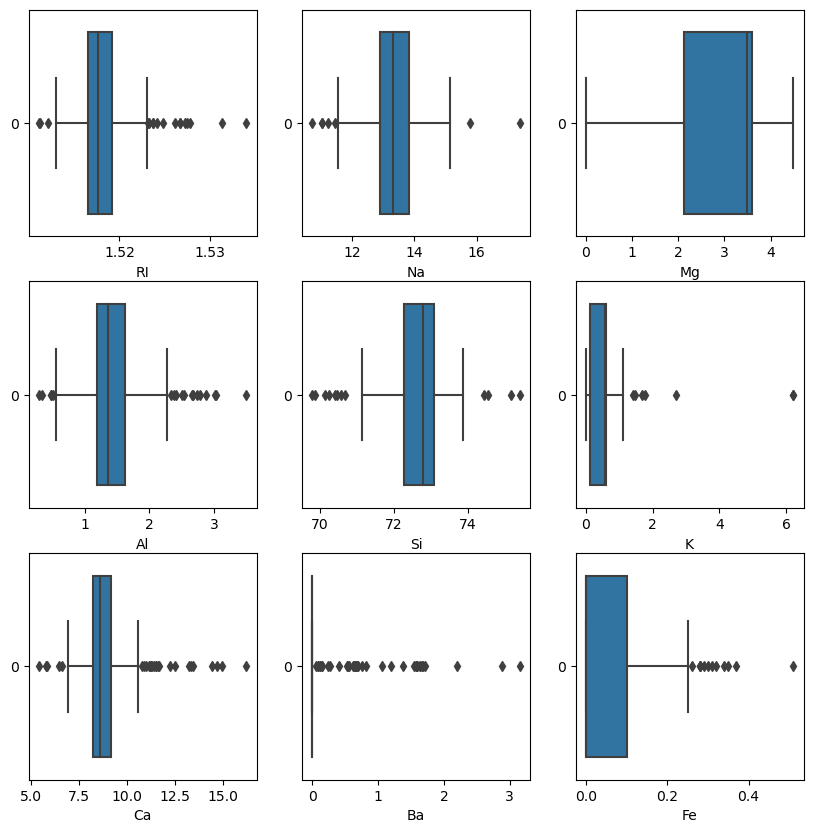

In [12]:
## Check for Outliers
plt.figure(figsize=(10,10))
pltnumber = 1

for column in data.drop(["index","Class"],axis=1):
    plt.subplot(3,3,pltnumber)
    sns.boxplot(data[column],orient="h")
    plt.xlabel(column)
    pltnumber += 1

In [13]:
# Imputing Outliers from RI
# LB = Q1 - 1.5(IQR)
# IQR = Q3 - Q1
Q1 = np.percentile(data["RI"],25)
Q3 = np.percentile(data["RI"],75)
IQR = Q3 - Q1
print(f"Value of Q1 is {Q1}, Value of Q3 is {Q3} and IQR is {IQR}.")

Value of Q1 is 1.5165225, Value of Q3 is 1.5191575 and IQR is 0.002634999999999943.


In [14]:
LB = Q1 - 1.5*(IQR)
UB = Q3 + 1.5*(IQR)
print("Lower Bound:",LB)
print("Upper Bound:",UB)

Lower Bound: 1.5125700000000002
Upper Bound: 1.52311


In [15]:
# Outliers present in RI
data.loc[(data["RI"] < LB) | (data["RI"] > UB)] 

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
47,48,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.10,1
50,51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
56,57,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
103,104,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2
104,105,1.52410,13.83,2.90,1.17,71.15,0.08,10.79,0.00,0.00,2
105,106,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,107,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,108,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
110,111,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
111,112,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2


In [16]:
#Filtering out the Outliers and replacing it with the mean value
data.loc[(data["RI"] < LB) | (data["RI"] > UB),"RI"] = np.median(data["RI"])

In [17]:
# Task: Remove required outliers

## Model Creation

In [18]:
## creating X and y
X=data.drop(['index','Class'], axis=1)
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [19]:
y=data.Class
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Class, Length: 214, dtype: int64

In [20]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #Object Creation
scaled_data=scaler.fit_transform(X)

In [21]:
## creating new dataframe
df=pd.DataFrame(data=scaled_data, columns= X.columns)

In [22]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.670683,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.144794,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.908362,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.118096,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.246247,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [23]:
df.shape

(214, 9)

In [24]:
## getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)

In [25]:
pca.explained_variance_ratio_

array([2.68108336e-01, 2.00869485e-01, 1.51957732e-01, 1.35982775e-01,
       1.00105766e-01, 5.72170891e-02, 4.99473270e-02, 3.56275779e-02,
       1.83911573e-04])

In [26]:
# Simplified of Explained variance Ratio
for index,value in enumerate(pca.explained_variance_ratio_):
    print("Variance for PCA",index+1,"is",value)

Variance for PCA 1 is 0.26810833580722376
Variance for PCA 2 is 0.20086948460895998
Variance for PCA 3 is 0.1519577322734695
Variance for PCA 4 is 0.13598277535958256
Variance for PCA 5 is 0.10010576633194675
Variance for PCA 6 is 0.05721708914559901
Variance for PCA 7 is 0.04994732703217944
Variance for PCA 8 is 0.035627577868410386
Variance for PCA 9 is 0.00018391157262858353


In [28]:
np.cumsum(pca.explained_variance_ratio_ )
#cumsum() adds up each element to the sum of all previous elements, creating a running total

array([0.26810834, 0.46897782, 0.62093555, 0.75691833, 0.85702409,
       0.91424118, 0.96418851, 0.99981609, 1.        ])

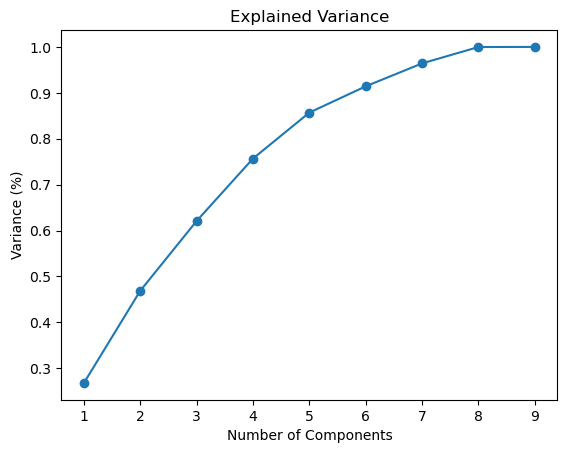

In [29]:
#plt.figure()
plt.plot(range(1,10),np.cumsum(pca.explained_variance_ratio_),marker="o")
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

From the diagram above, it can be seen that 6 principal components explain almost 90% of the variance in data and 7 principal components explain around 95% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these 6 principal components of the data to the machine learning algorithm and we’d obtain a similar result.

In [30]:
pca = PCA(n_components=6) #Object Creation
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data,
              columns = ['PCA 1', 'PCA 2','PCA 3','PCA 4','PCA 5','PCA 6'])

In [31]:
## new pca dataframe
principal_Df.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6
0,-1.725517,-0.333123,-0.878384,1.619620,-0.361960,0.386727
1,0.059837,0.682408,-1.088222,0.429997,-0.187782,-0.175259
2,0.494913,1.072998,-0.936802,-0.213057,-0.116754,0.098641
3,-0.325736,0.850703,-0.500986,0.232253,-0.429629,0.279386
4,-0.200127,0.967590,-0.811410,-0.227267,-0.307947,0.217191


Here, we see that earlier we had 9 columns in the data earlier. Now with the help of Scree plot and PCA, we have reduced the number of features to be used for model building to 6. This is the advantage of PCA. _It drastically reduces the number of features, thereby considerably reducing the training time for the model._

In [37]:
#svc 

x = principal_Df
y = data['Class']
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [38]:
# implement the model
# import the algo
from sklearn.svm import  SVC

#initialization
model=SVC()

#train the model
model.fit(x_train,y_train)

SVC()

In [39]:
y_pred = model.predict(x_test)

In [40]:
   from sklearn.metrics import accuracy_score,classification_report
Accuracy = accuracy_score(y_test,y_pred)
Accuracy #testing accuracy 

0.6461538461538462

In [45]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest
rf_clf = RandomForestClassifier(n_estimators=50)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(x_train,y_train)#training the data
y_predict=rf_clf.predict(x_test)

In [46]:
   from sklearn.metrics import accuracy_score,classification_report
Accuracy = accuracy_score(y_test,y_predict)
Accuracy #testing accuracy

0.6923076923076923

In [ ]:
## Task: create 2 models where in first model with all fetaures and second model with 4 pca features and check the performance
#using K-means clustering 
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5,random_state=10)
model.fit(df)

In [ ]:
#centroids
model.cluster_centers_

In [ ]:
model.labels_ #cluster labels

In [ ]:
color = np.array(['red','orange','blue','purple','black','green','yellow','brown','grey'])
sns.scatterplot(x=df.RI, y = df.Na,hue=color[model.labels_])

In [ ]:
# here we see overlapping of clusters 
# because we have selected a wrong k value 


In [ ]:
WCSS = []

for k in range(2,11):
    model = KMeans(n_clusters=k,random_state=9)
    model.fit(df)
    WCSS.append(model.inertia_)
plt.plot(range(2,11),WCSS)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Elbow Method')

### Conclusion
From all the explanations above, we can conclude that PCA is a very powerful technique for reducing the dimensions of the data, projecting the data from a higher dimension to a lower dimension, helps in data visualization, helps in data compression and most of all increases the model training speed drastically by decreasing the number of variables involved in computation.